In [2]:
from evaluate_12ECG_score import evaluate_12ECG_score
from driver import load_challenge_data
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import exp_net_params, default_net_params
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# Huber loss as decisive


In [3]:

csv_path="/home/puszkar/ecg/results/csv_outputs/12112020v1-huber"
test_path = "/home/puszkar/ecg/data/test"

In [4]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

In [5]:
def simmilar(row1, row2):
    for i, x in enumerate(row1):
        if x == row2[i] and x == 1:
            return True
    return False

def numeric_classes(array2d):
    result = []
    for single_array in array2d:
        for idx, value in enumerate(single_array):
            if value != 0:
                result.append(idx)
                break

    return result

In [6]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1] --> [0 0 0 0 0 0 0 0 1]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0] --> [1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 0 0] --> [1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 1 0 0 0] --> [0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0] --> [0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0] --> [0 0 0 0

131

[]

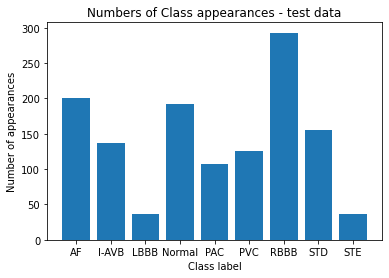

In [39]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_true.sum(axis=0))
plt.title("Numbers of Class appearances - test data")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

[]

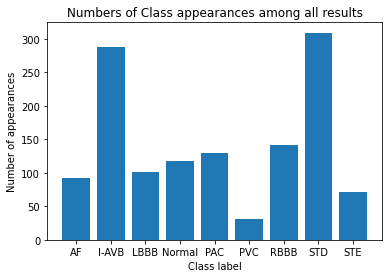

In [8]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [9]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

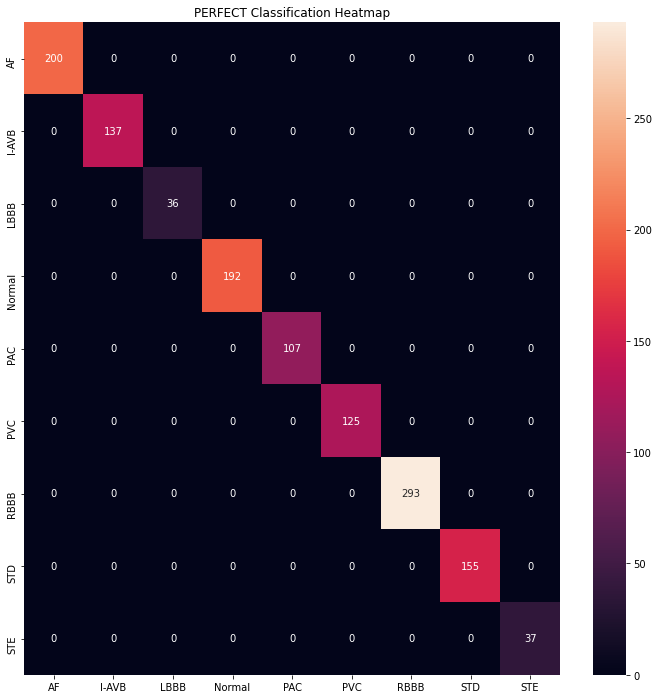

In [10]:
real_confusion = confusion_matrix(y_true_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("PERFECT Classification Heatmap")
sns.heatmap(real_confusion, annot=True, cbar=True, xticklabels=sorted(default_net_params["classes"]), yticklabels=sorted(default_net_params["classes"]), fmt="g")
plt.plot()
real_confusion[real_confusion == 0] = 1

In [11]:
def draw_confusion(y_pred_numeric, y_true_numeric):
    confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
    fig = plt.figure(figsize=(12,12))
    plt.title("Classification Heatmap")
    sns.heatmap(np.round(confusion/real_confusion, 3), annot=True, cbar=True, xticklabels=sorted(default_net_params["classes"]), yticklabels=sorted(default_net_params["classes"]), fmt="g")
    plt.plot()

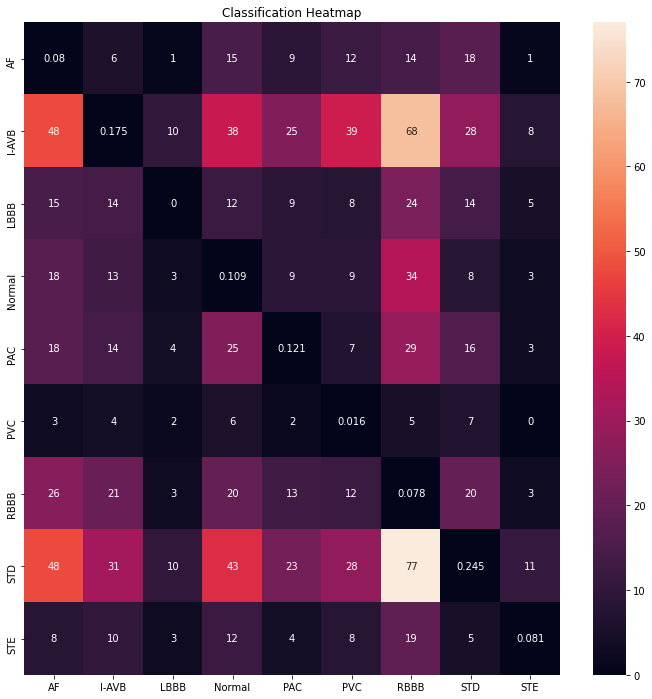

In [12]:
draw_confusion(y_pred_numeric, y_true_numeric[:-1])

In [13]:
def draw_rocs(y_true, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 9
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    color="red"
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    classes = sorted(['LBBB', 'STD', 'Normal', 'RBBB', 'AF', 'I-AVB', 'STE', 'PAC', 'PVC'])

    # Plot all ROC curves
    for i in range(9):
        plt.figure(figsize=(12,10))
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        plt.plot(fpr[i], tpr[i], color=color,
            label='ROC curve of class {0} (area = {1:0.2f})'
            ''.format(classes[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right", fontsize="xx-large")
        plt.show()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


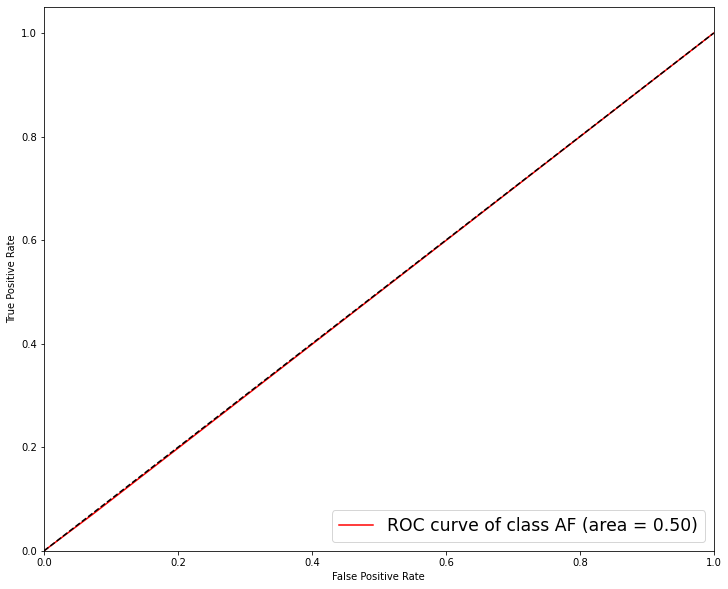

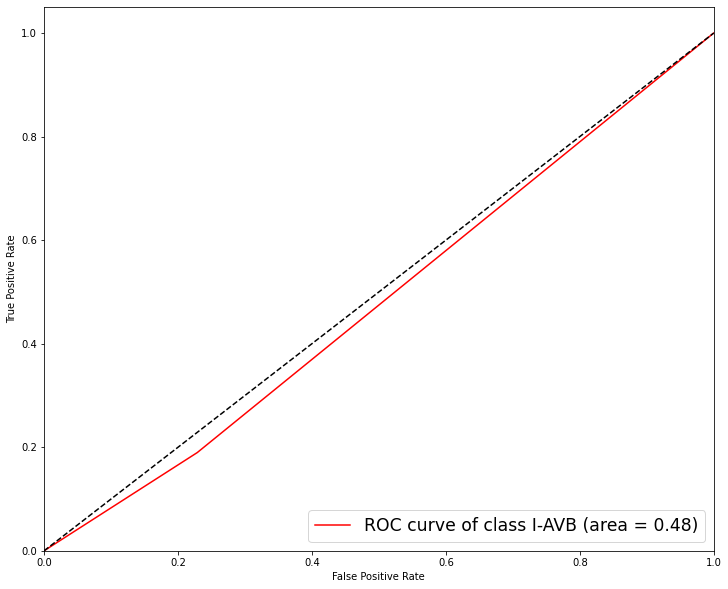

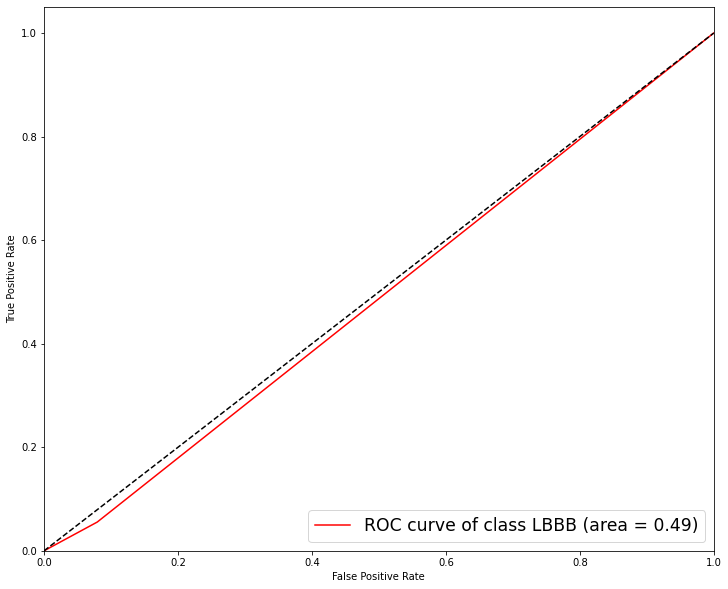

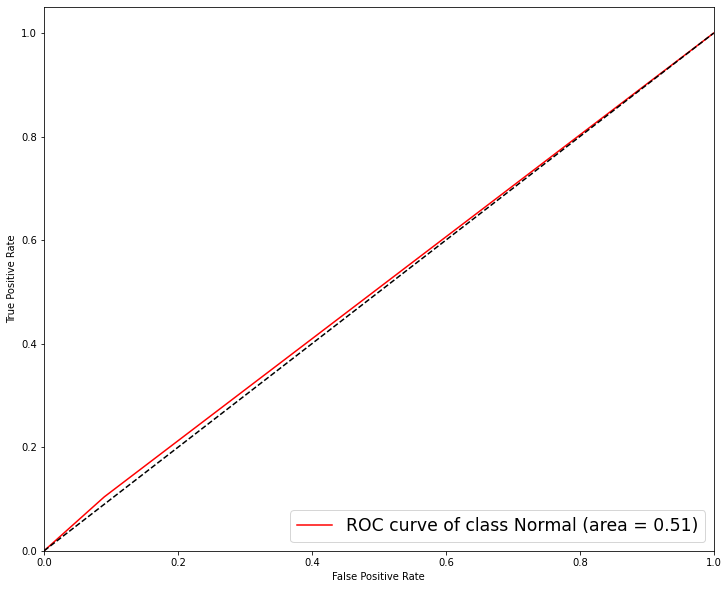

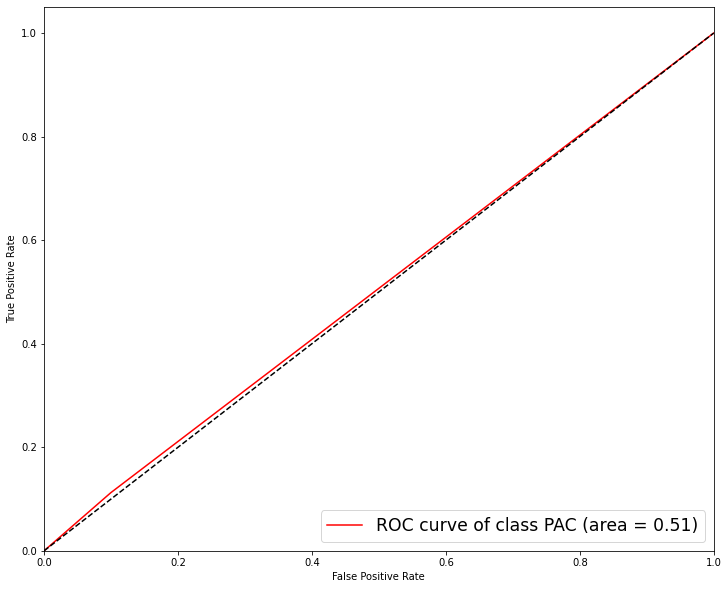

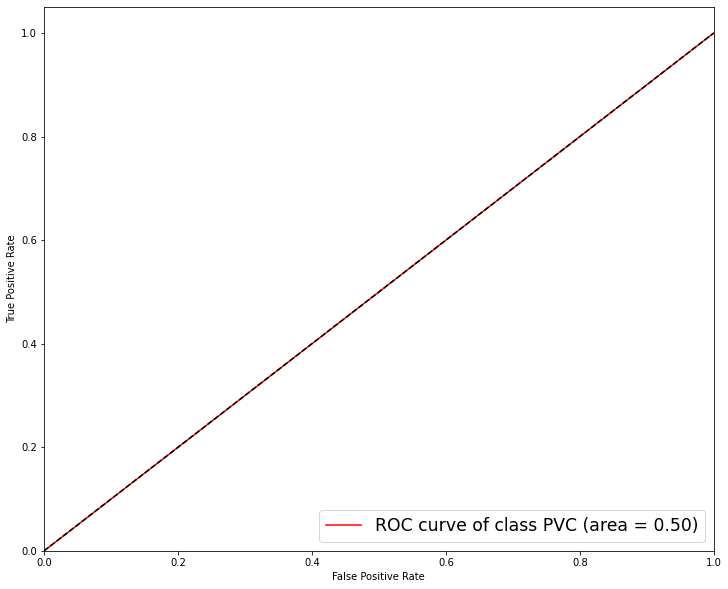

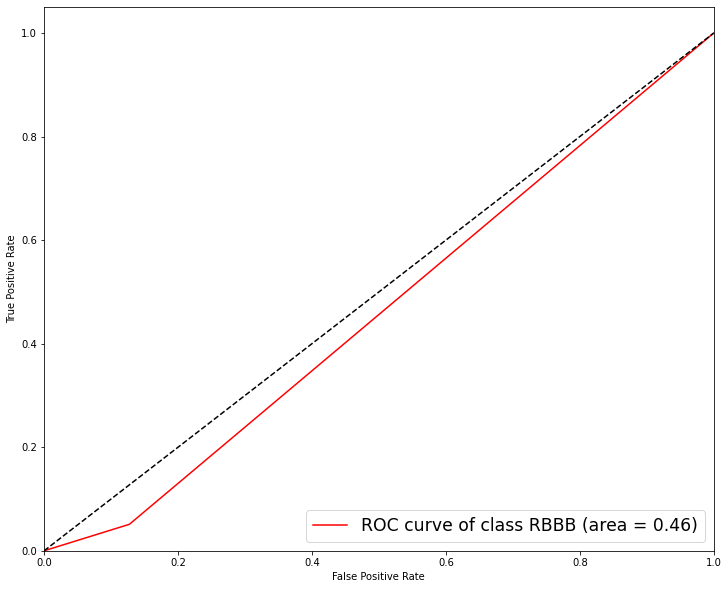

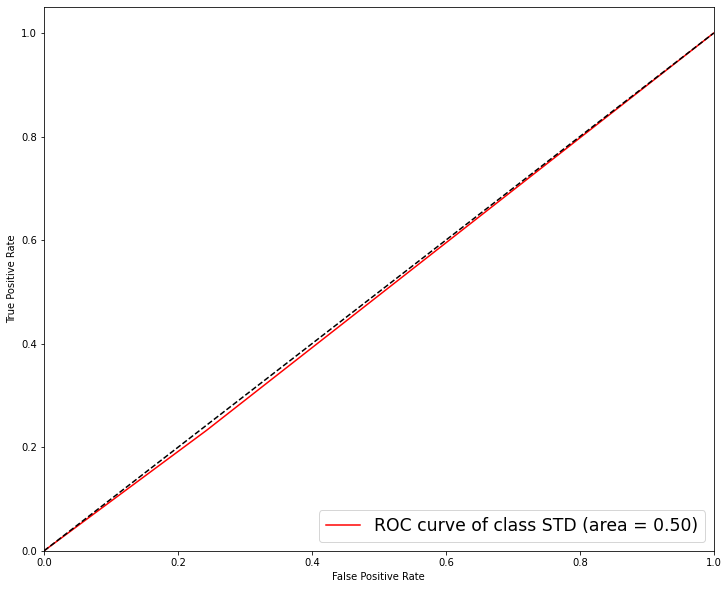

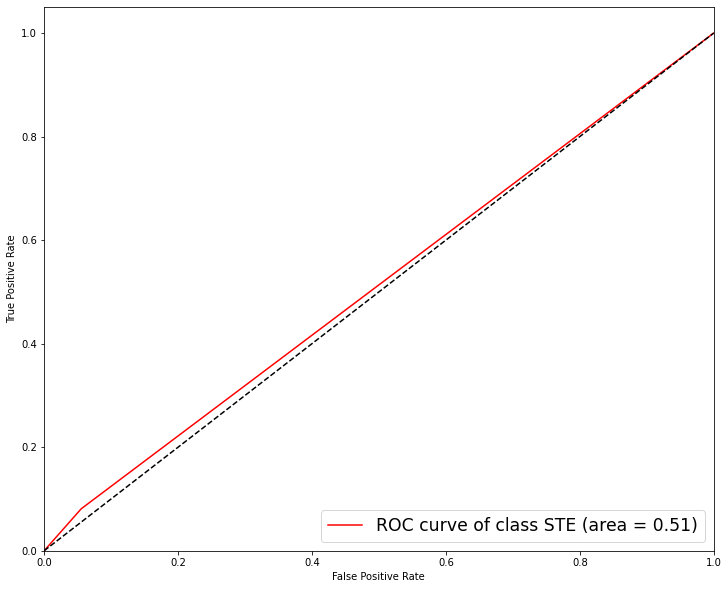

In [14]:
draw_rocs(y_true, y_pred)

# MSLE criterion as decisive

In [15]:
csv_path="/home/puszkar/ecg/results/csv_outputs/12112020v1-msle"
test_path = "/home/puszkar/ecg/data/test"

In [16]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

[]

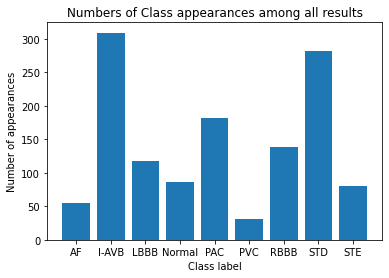

In [17]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [18]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

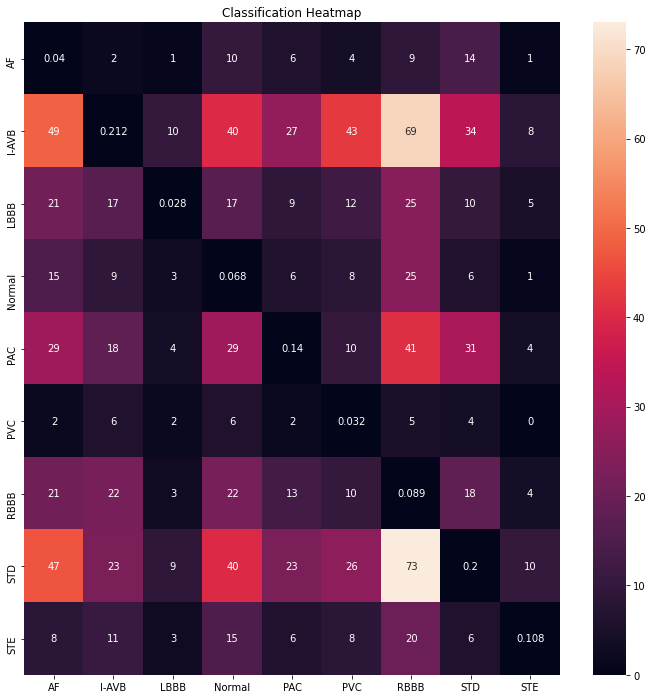

In [19]:
draw_confusion(y_pred_numeric, y_true_numeric[:-1])

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


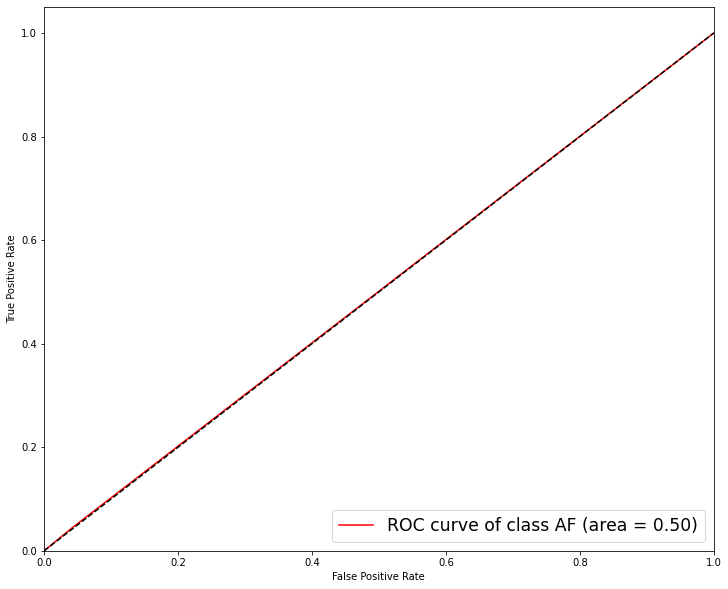

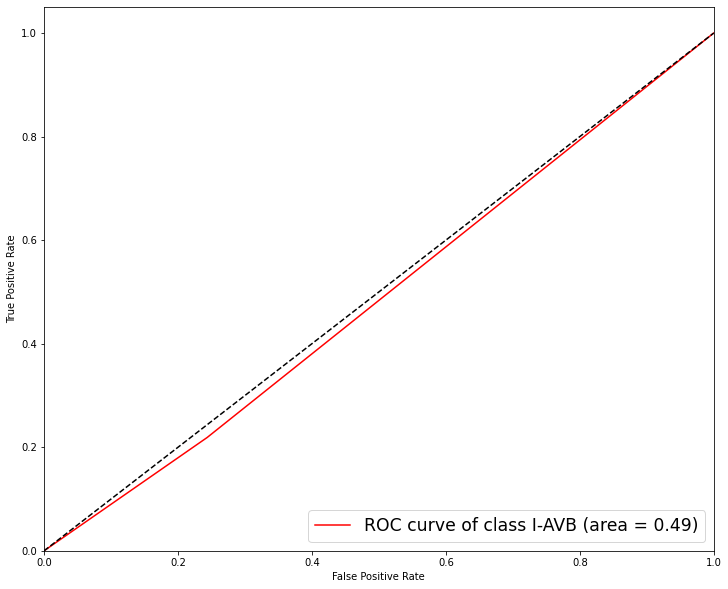

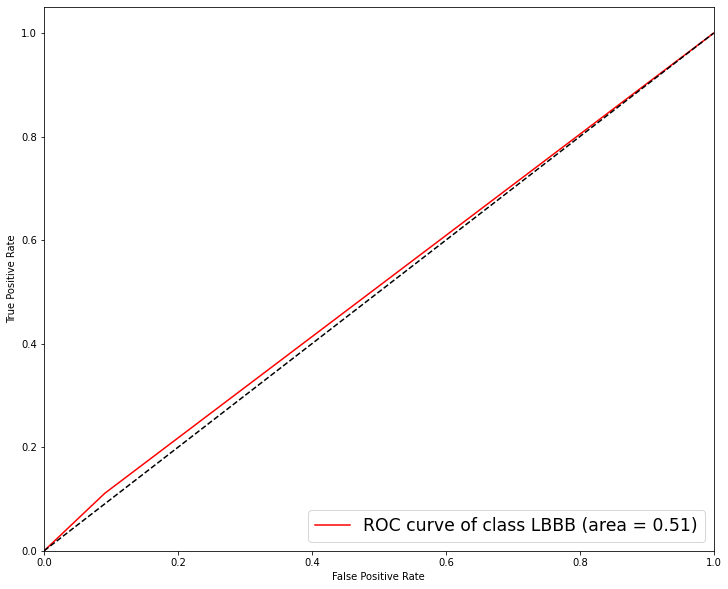

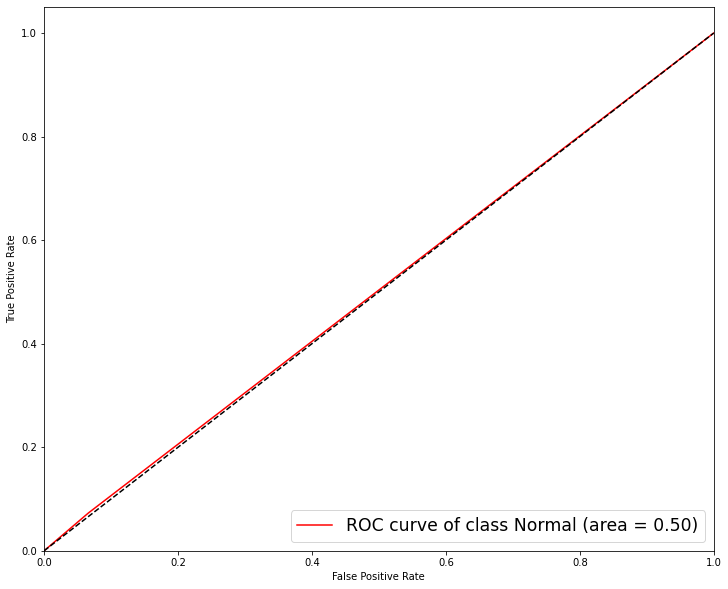

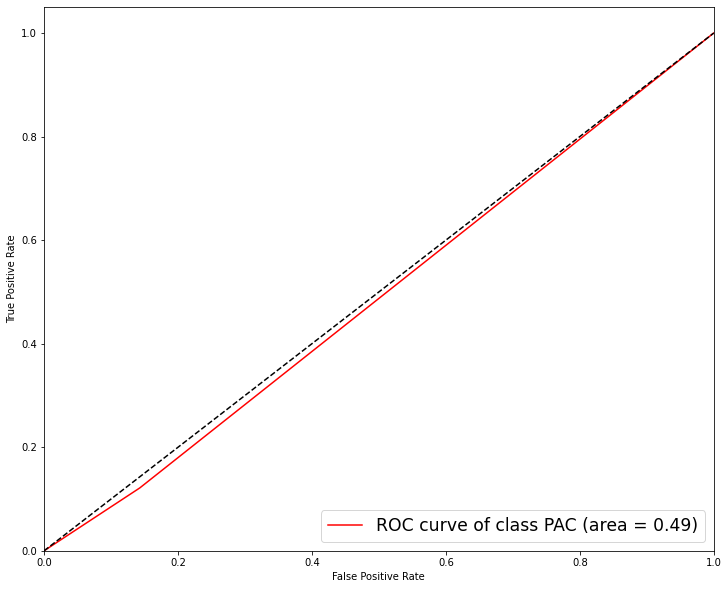

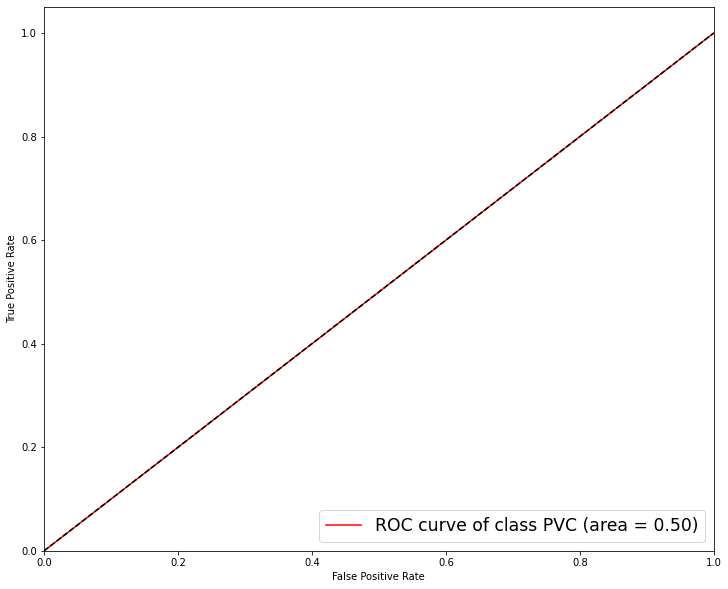

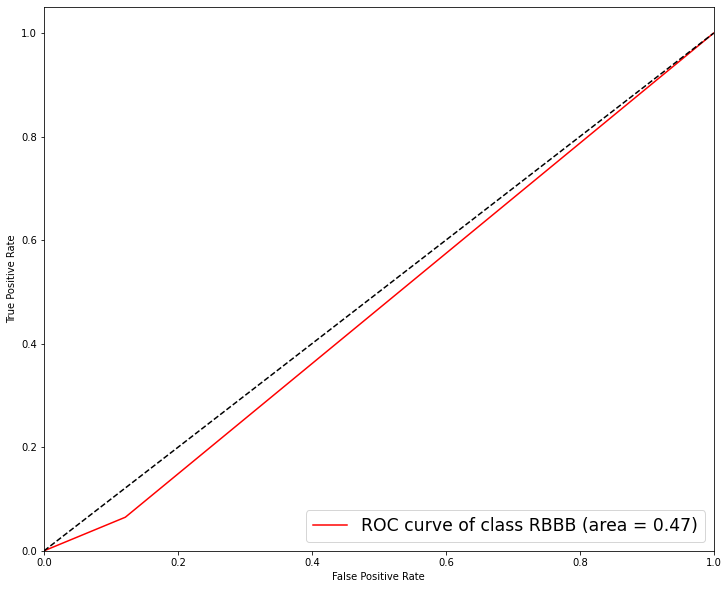

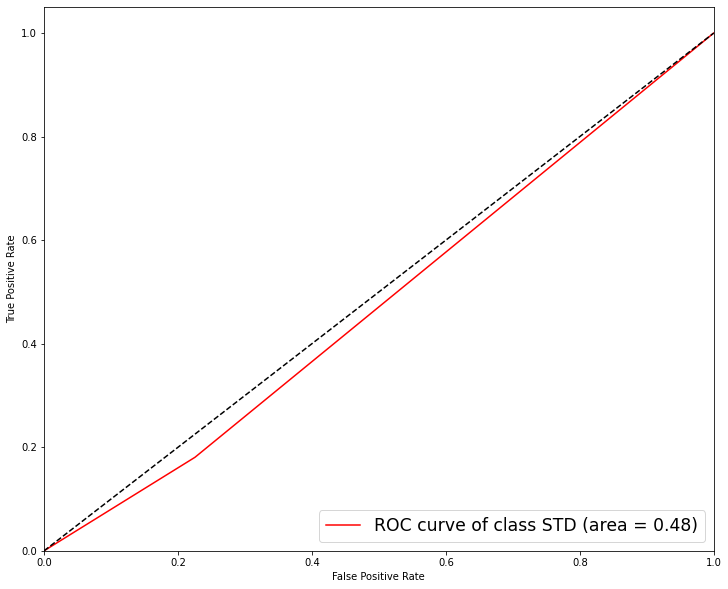

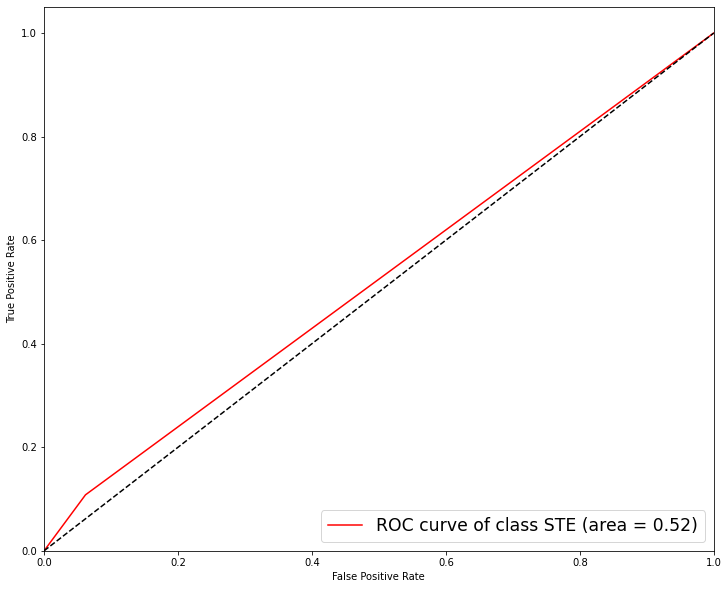

In [20]:
draw_rocs(y_true, y_pred)

# LogCosh as decisive

In [21]:
csv_path="/home/puszkar/ecg/results/csv_outputs/12112020v1-logcosh"
test_path = "/home/puszkar/ecg/data/test"

In [22]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

[]

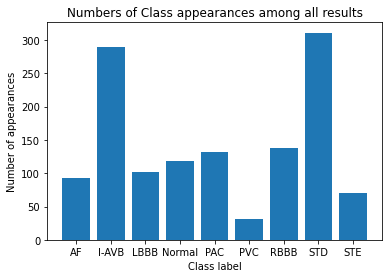

In [23]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [24]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

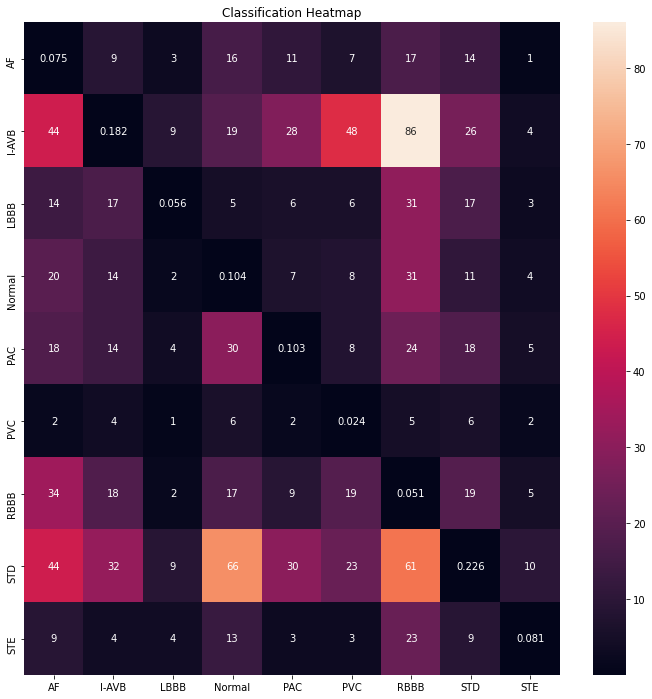

In [25]:
draw_confusion(y_pred_numeric, y_true_numeric)

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


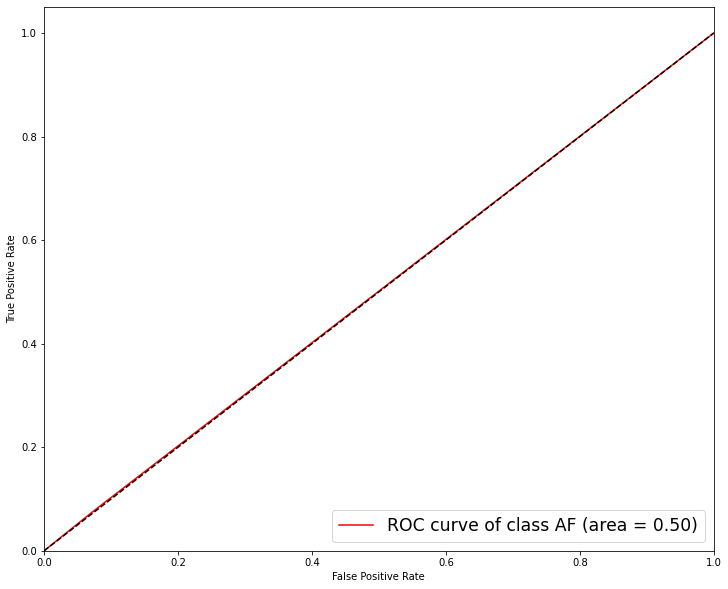

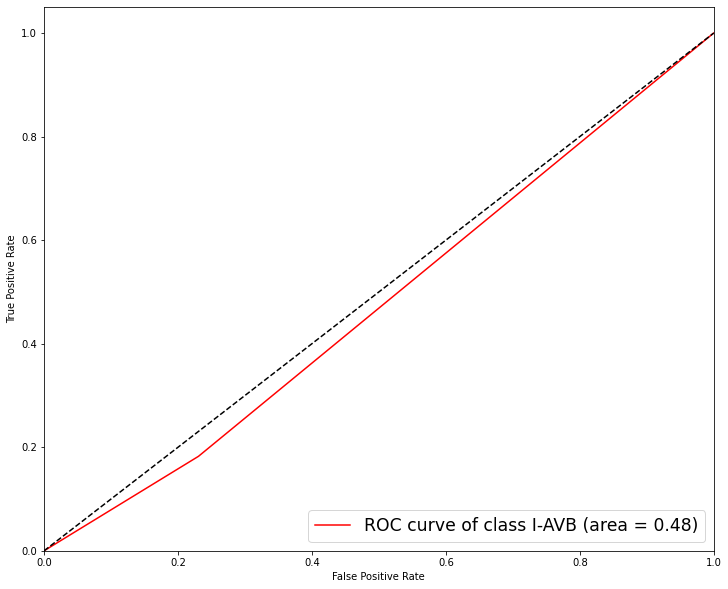

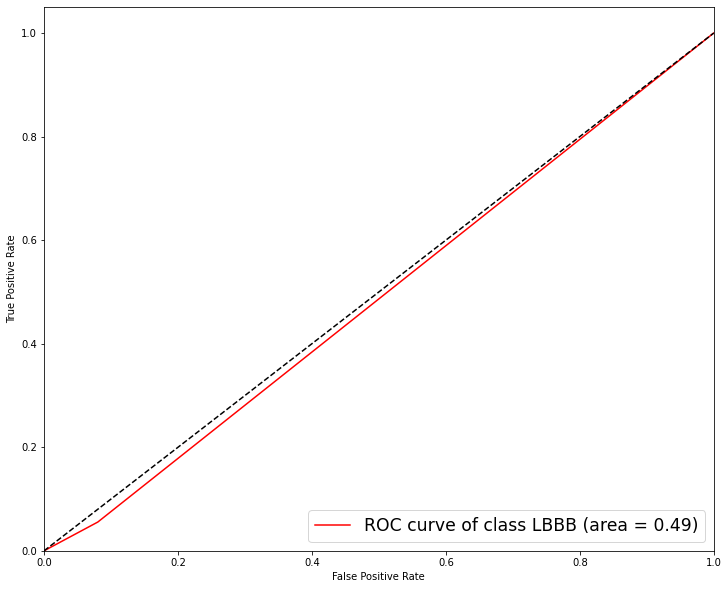

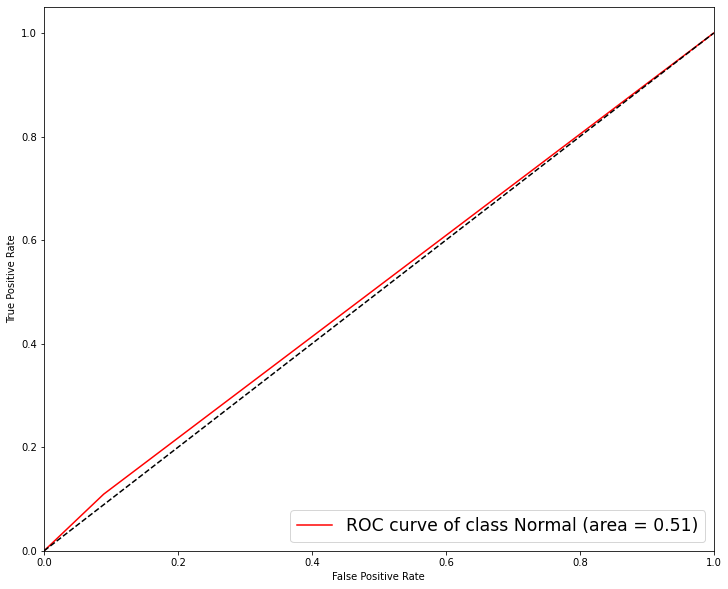

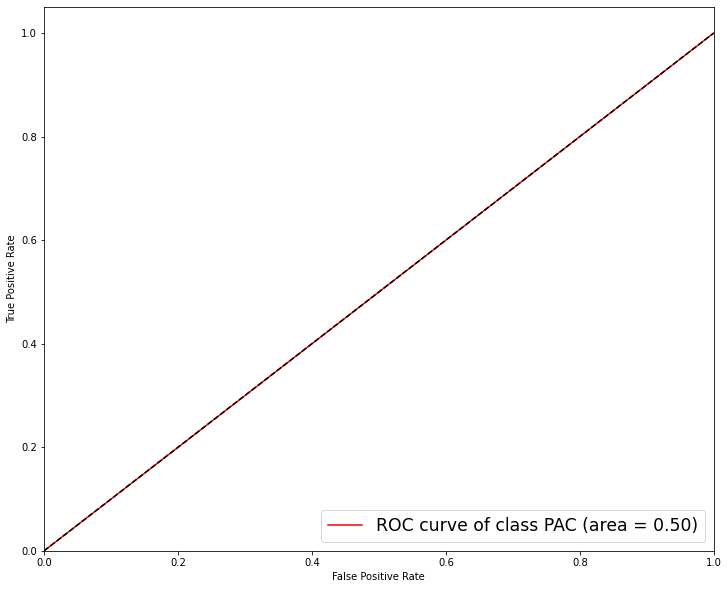

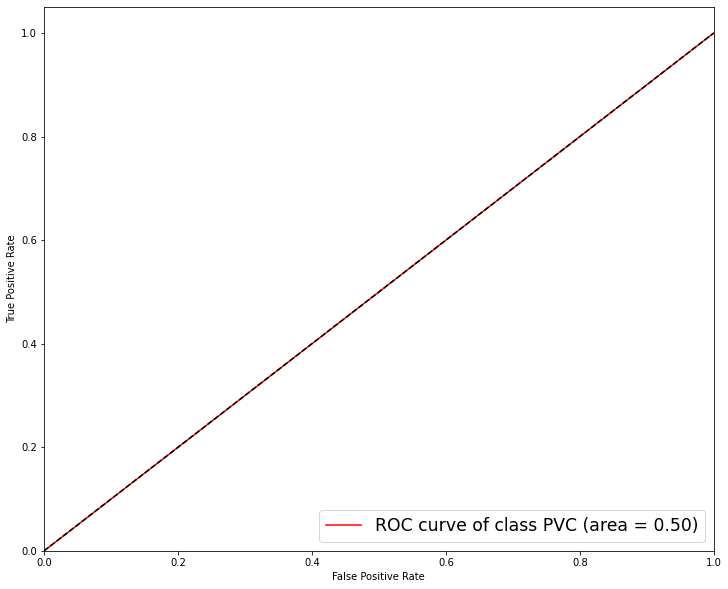

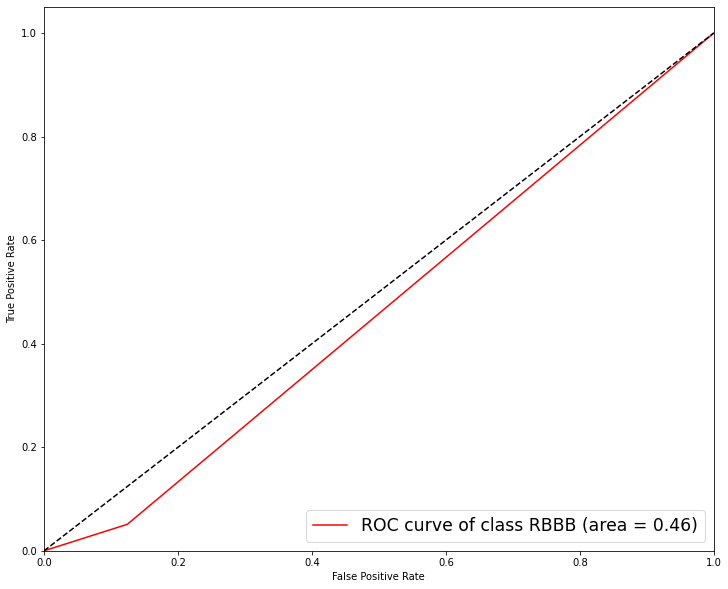

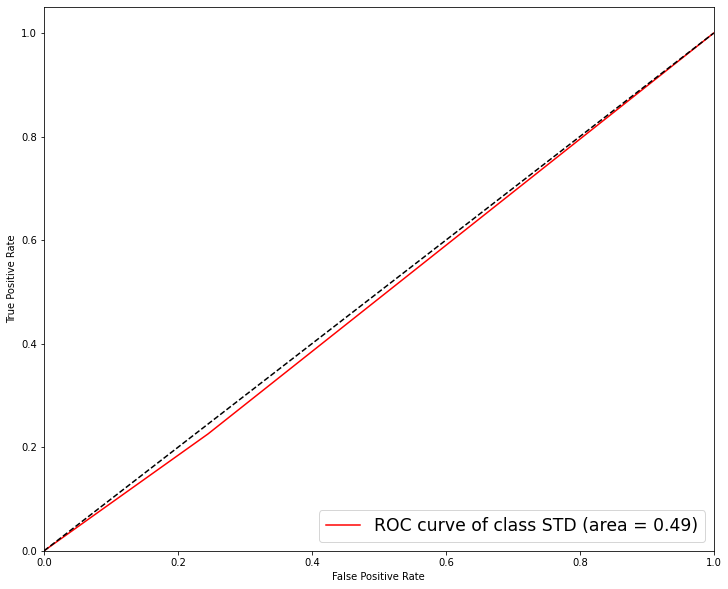

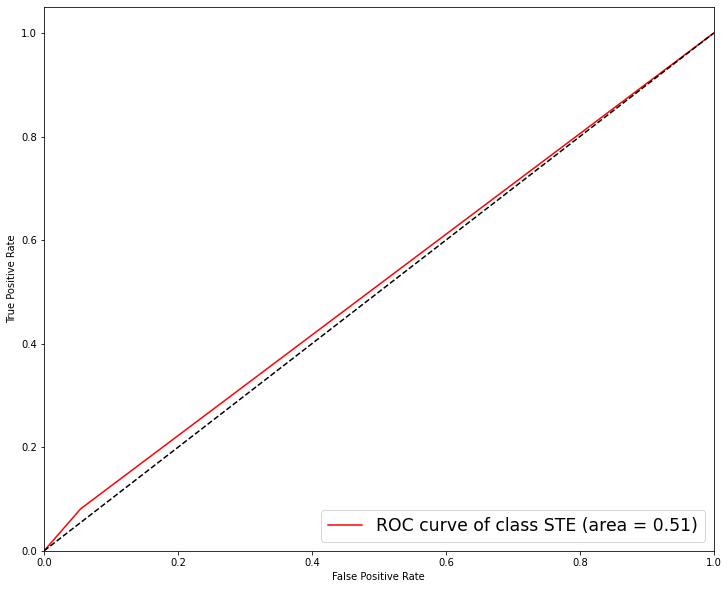

In [26]:
draw_rocs(y_true, y_pred)

# MSE loss as a criterion

In [27]:
csv_path="/home/puszkar/ecg/results/csv_outputs/14112020v1-mse"
test_path = "/home/puszkar/ecg/data/test"

In [28]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

[]

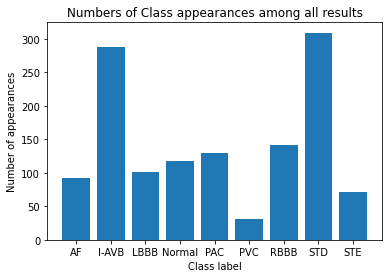

In [29]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [30]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

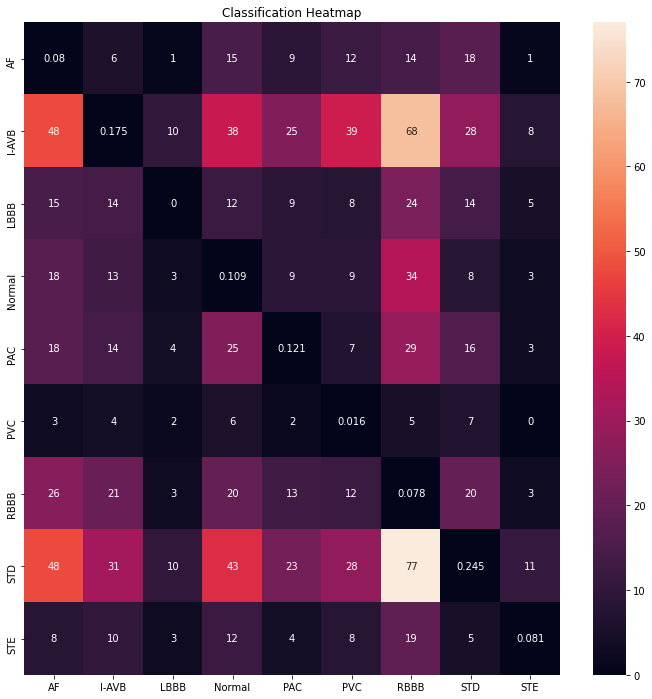

In [31]:
draw_confusion(y_pred_numeric, y_true_numeric[:-1])

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


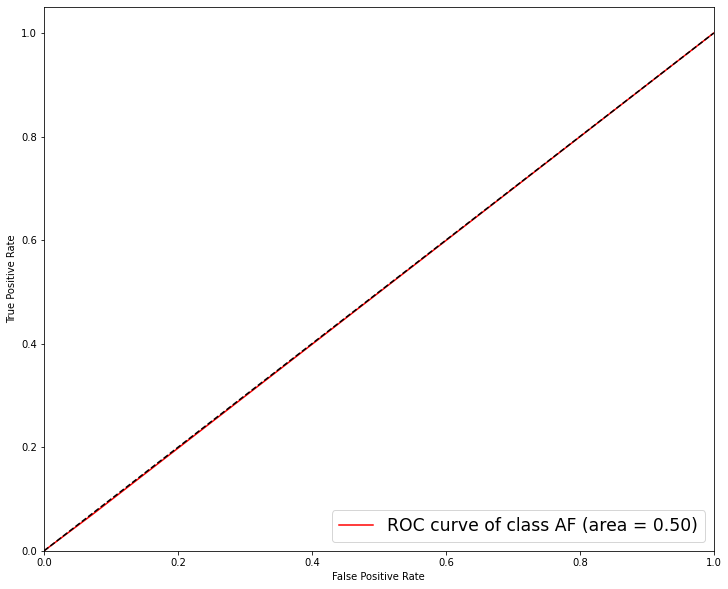

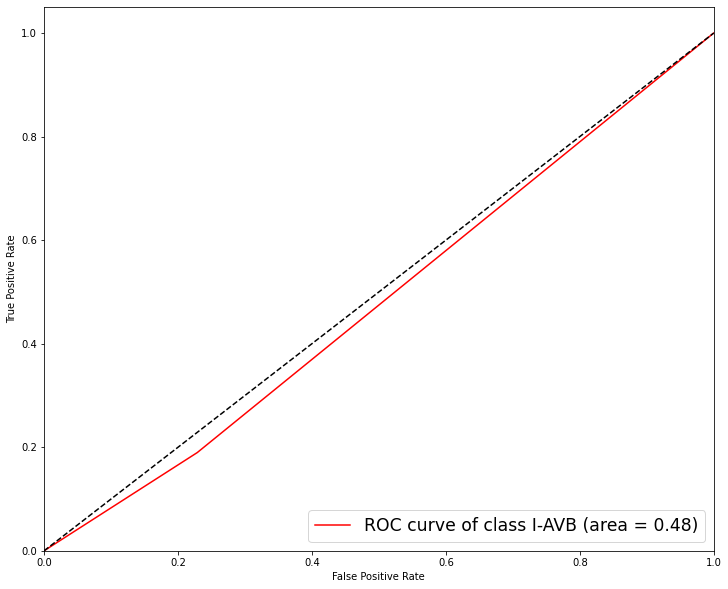

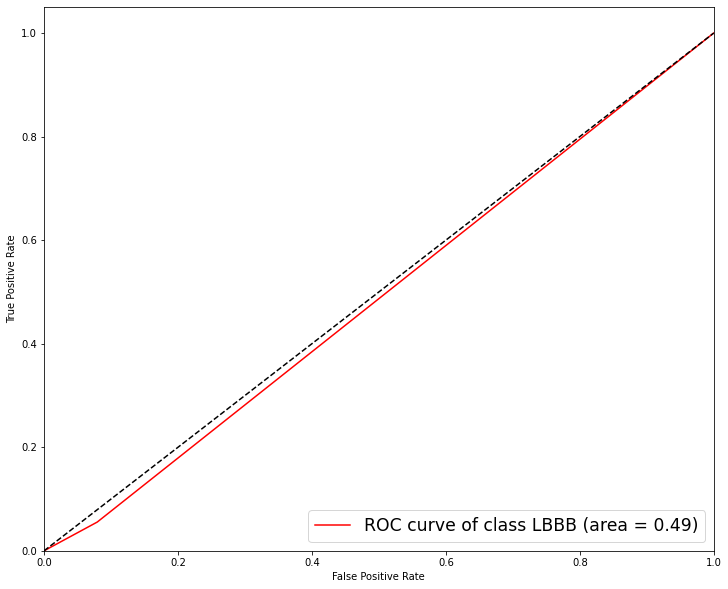

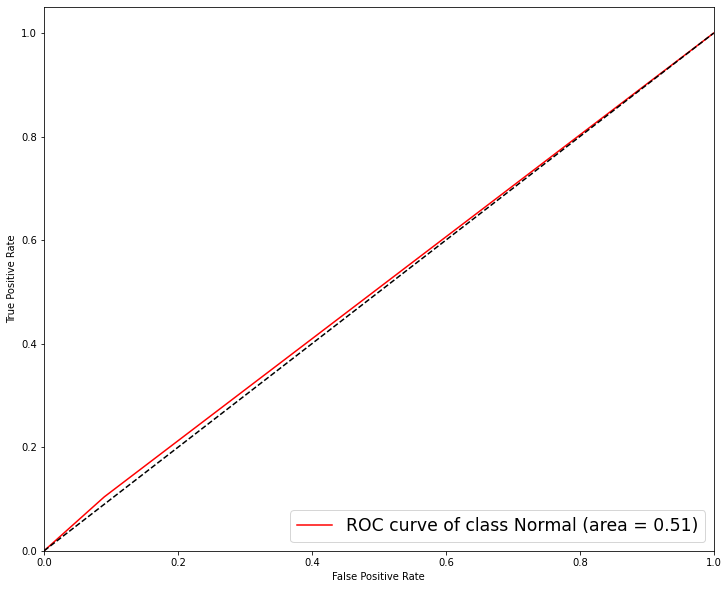

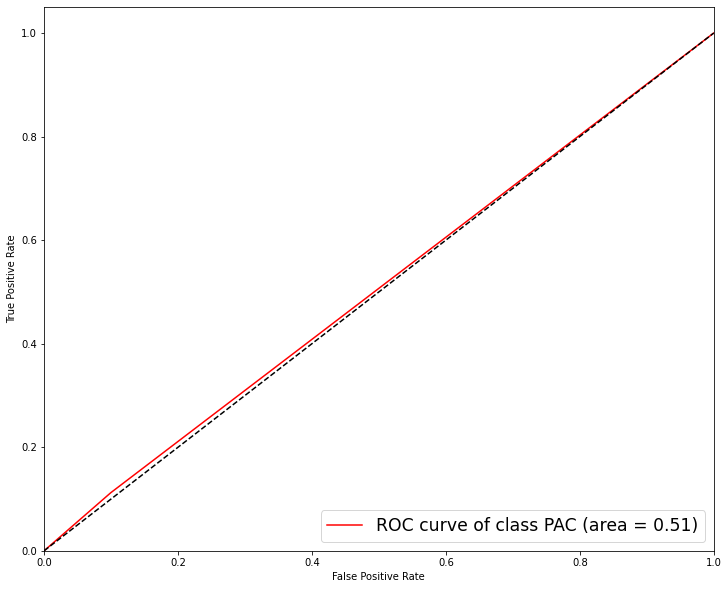

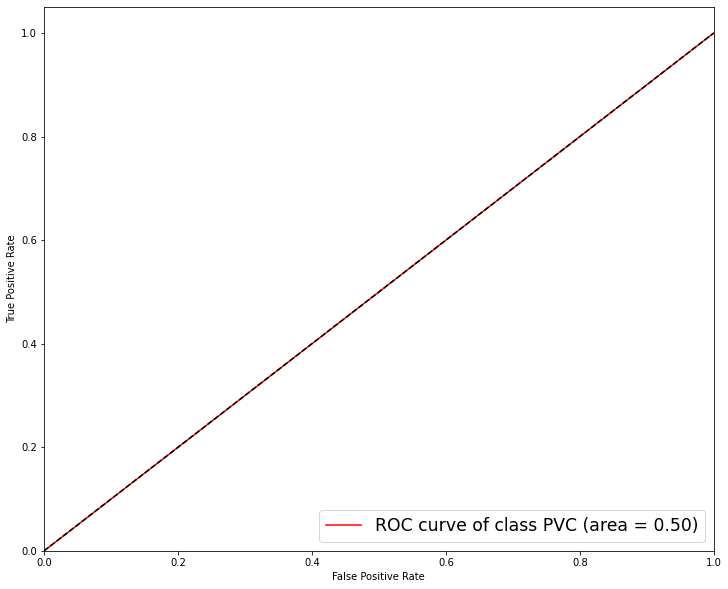

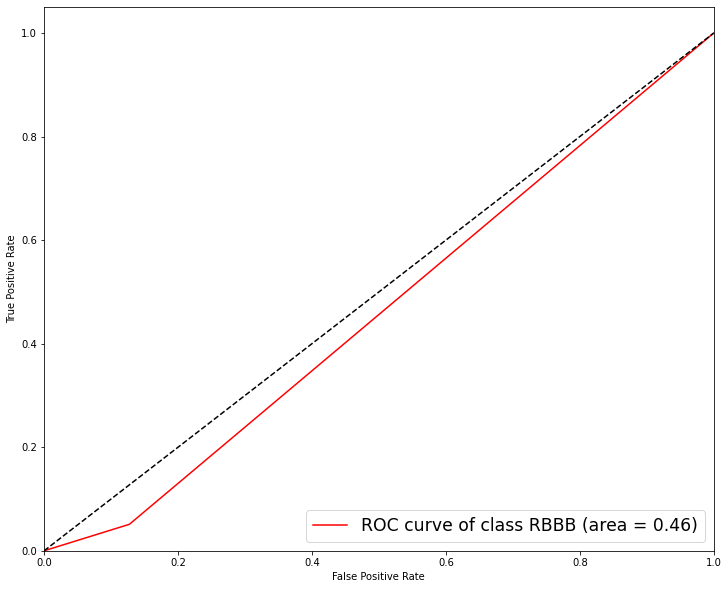

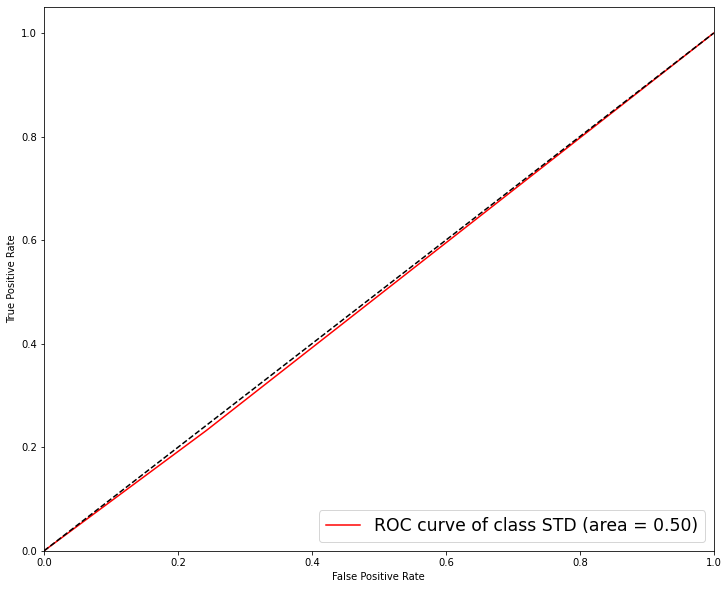

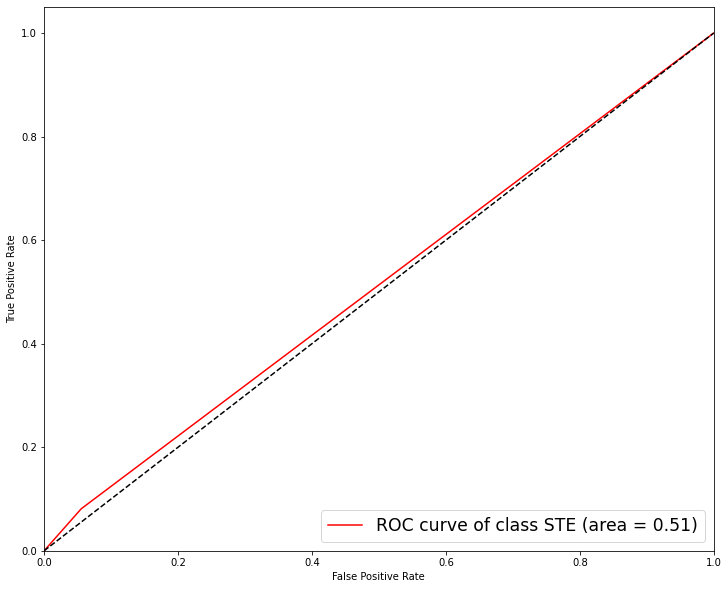

In [32]:
draw_rocs(y_true, y_pred)

# FASTDTW loss as a criterion

In [33]:
csv_path="/home/puszkar/ecg/results/csv_outputs/14112020v1-fastdtw"
test_path = "/home/puszkar/ecg/data/test"

In [34]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

[]

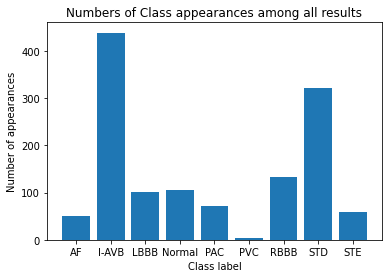

In [35]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [36]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

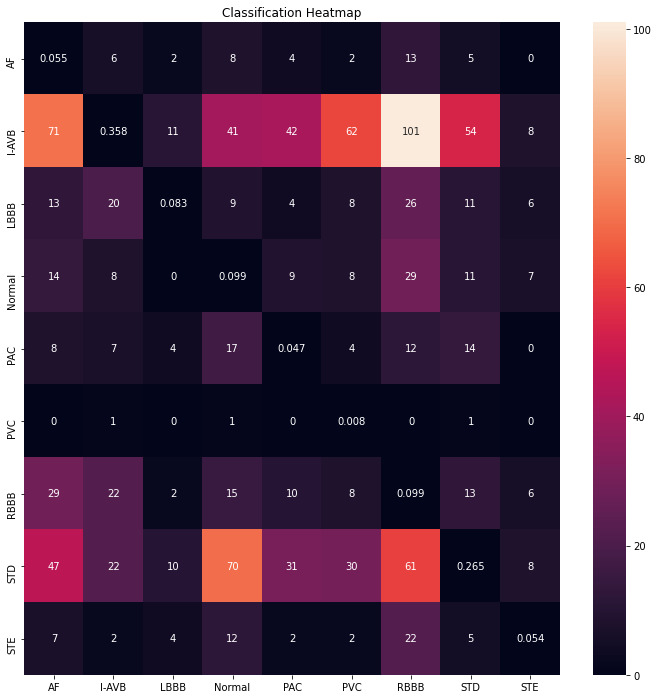

In [37]:
draw_confusion(y_pred_numeric, y_true_numeric)

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


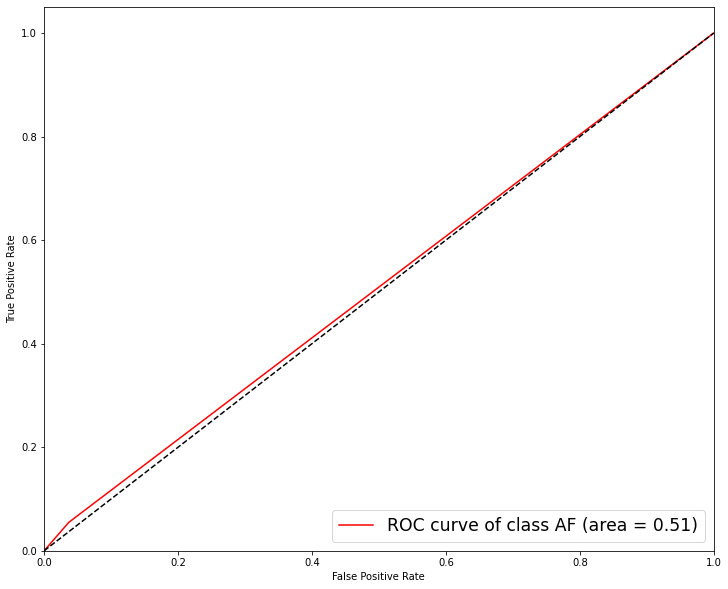

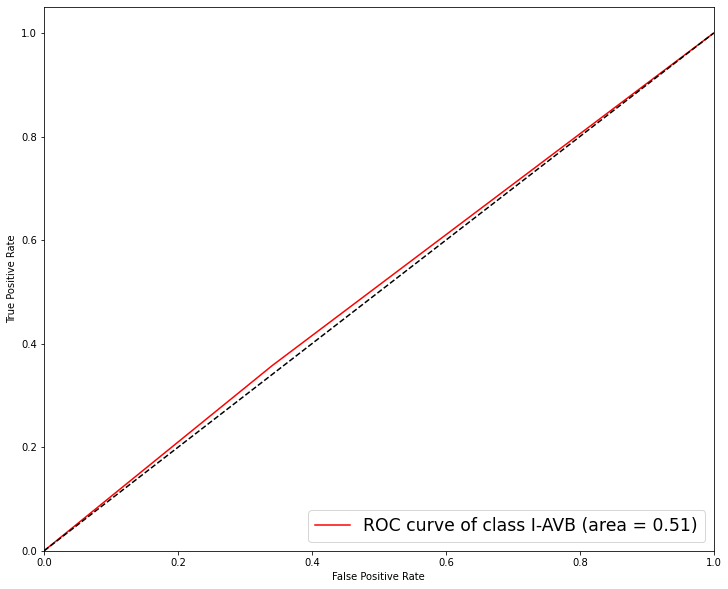

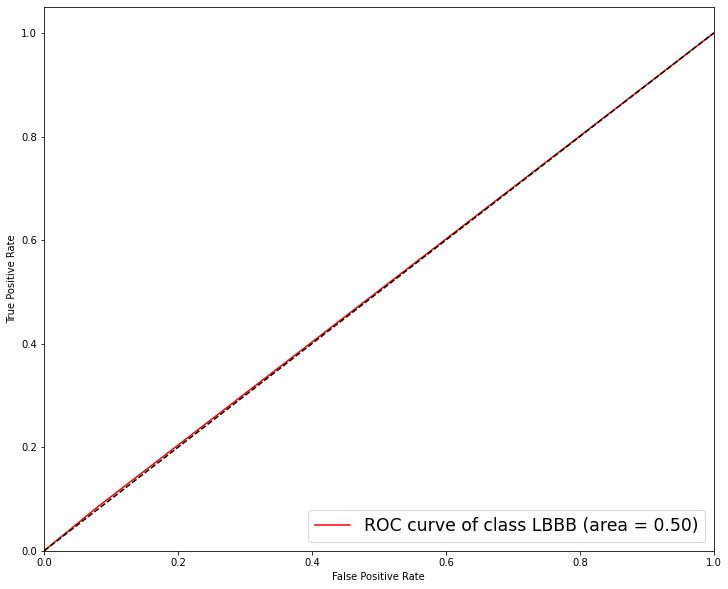

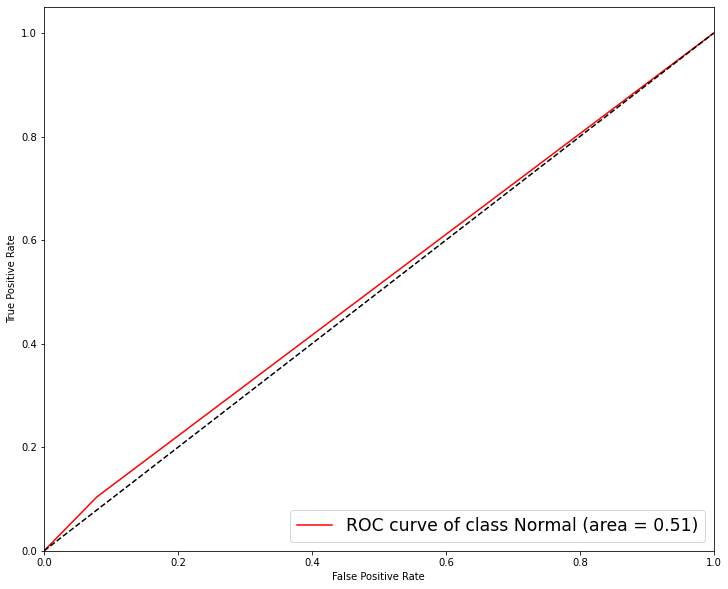

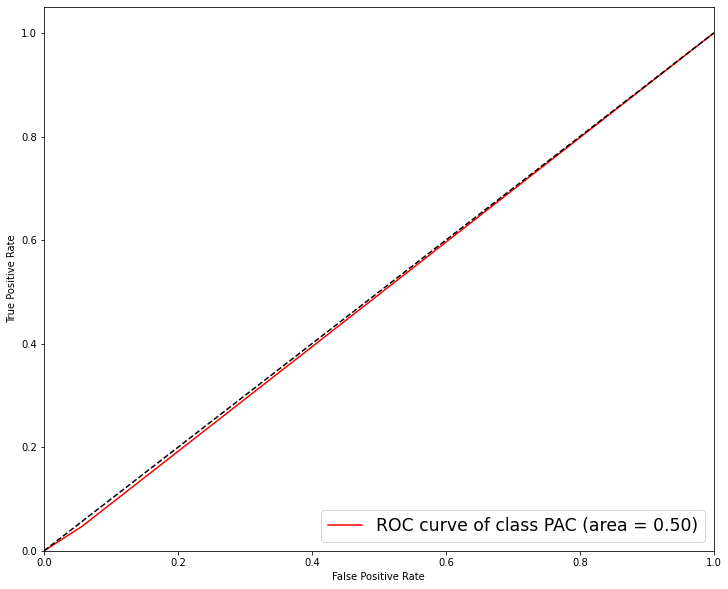

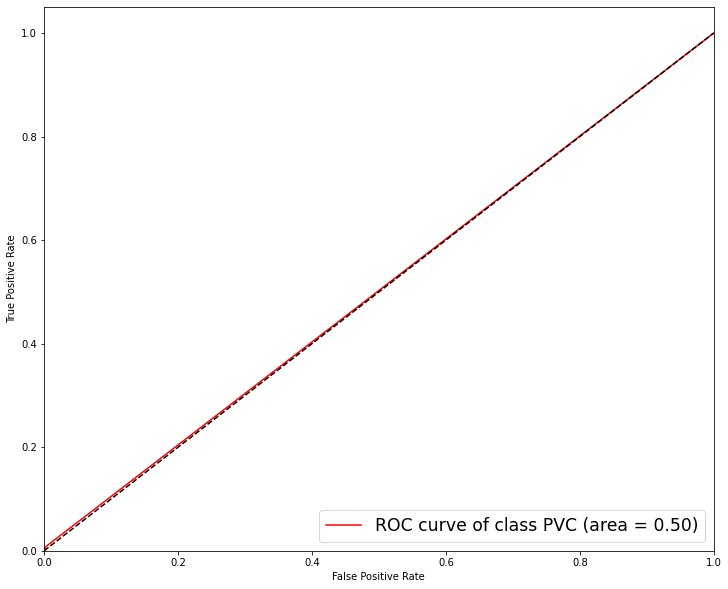

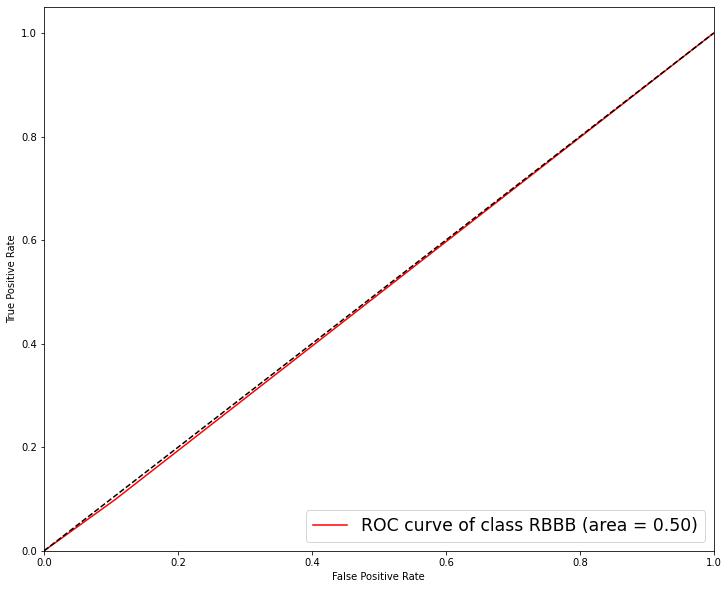

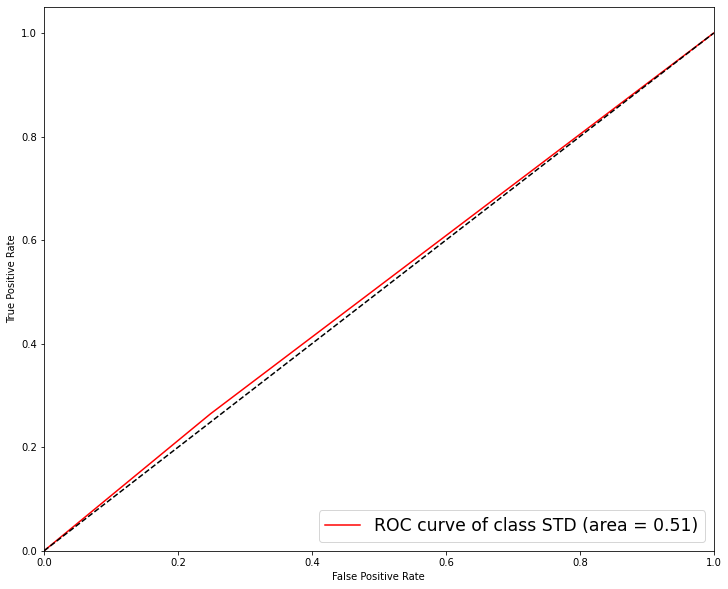

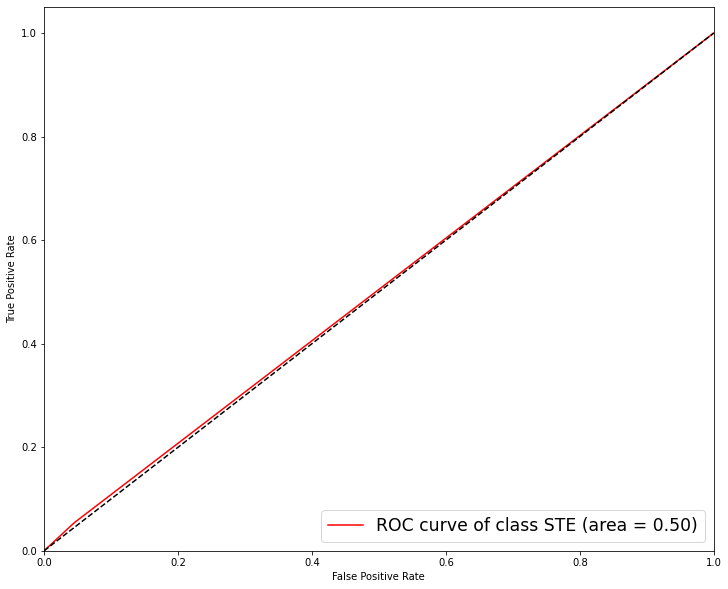

In [38]:
draw_rocs(y_true, y_pred)